## 그룹화(Cluster)
- 비지도 학습 : label 이 없는 datasets

## 데이터 수집

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# iris_dataset

## 데이터분석

## 데이터 전처리

In [4]:
features = iris_dataset['data']
features[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [5]:
iris_dataset['target'], iris_dataset['feature_names']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

### 결측치 처리

### 스케일링 
- 지수화와 비슷

## 데이터 분할

## 모델 학습

### 알맞은 그룹 갯수 찾기

In [ ]:
from sklearn.cluster import KMeans

In [16]:
cluster_loop_list = [2,3,4,5,6,7,8,9,10]

result_list = list()
for number_cluster in cluster_loop_list :
    model_number = KMeans(n_clusters=number_cluster)
    model_number.fit(features)
    result_list.append(model_number.inertia_)
    pass

result_list

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

[152.3479517603579,
 78.85144142614601,
 57.228473214285714,
 46.44618205128206,
 39.03998724608725,
 34.62008318478907,
 30.112388528138528,
 28.13736403508772,
 26.490099585451418]

### Elbow 확인

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

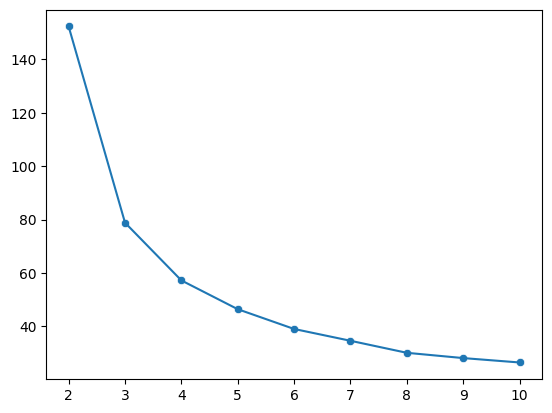

In [19]:
sns.scatterplot(x=cluster_loop_list, y=result_list)
sns.lineplot(x=cluster_loop_list, y=result_list)
plt.show()

### 찾은 갯수로 학습

In [8]:
# 중앙 갯수(카테고리 갯수) 지정
# model_KMeans = KMeans(n_clusters=3)
model_KMeans = KMeans(n_clusters=4)     # 카레고리 갯수를 임의 지정
model_KMeans.fit(X=features)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## 모델 평가

In [12]:
import numpy as np
# features row별 model이 predict label 값들
# model_KMeans.labels_, 
np.unique(model_KMeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [13]:
# 각 카테고리별 중앙 벡터 확인
model_KMeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.23658537, 2.85853659, 4.80731707, 1.62195122],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ]])

## 모델 배포